# ANALYZING DATA CONCERNING TAXI COMPANIES IN CHICAGO

# Introduction <a id='intro'></a>

- There are three datasets for analysis. The initial dataset includes company names alongside the corresponding number of trips completed by taxis owned by those companies. 
- The second dataset comprises dropoff location names (neighborhoods) and the average number of trips to those neighborhoods. These first two datasets are pivotal for primary analysis. 
- Additionally, the third dataset entails dates, times, weather conditions, and trip durations from the Loop neighborhood to O'Hare International Airport specifically on Saturdays. This dataset will be used for hypothesis testing.

> Column description:
> - company_name: taxi company name
> - trips_amount: the number of rides for each taxi company on November 15-16, 2017. 
> - dropoff_location_name: Chicago neighborhoods where rides ended
> - average_trips: the average number of rides that ended in each neighborhood in November 2017. 
> - start_ts: pickup date and time
> - weather_conditions: weather conditions at the moment the ride started
> - duration_seconds: ride duration in seconds

## Goals:

- To identify the top 10 neighborhoods in terms of drop-offs
- To determine the ranking cab companies by number of trips

<a id="0"></a> <br>
 # Table of Contents  
1. [Stage 1: Data Preprocessing](#1)     
1. [Stage 2: Exploratory Data Analysis](#2) 
    1. [The Top 10 Dropoff Locations](#3) 
    1. [Ranking Cab Companies by Number of Trips](#4) 
1. [Stage 3: Hypothesis Testing](#5) 
    1. [The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.](#6) 
1. [Stage 4: General Conclusion](#7) 

<a id="1"></a> 
# Stage 1 : Data Preprocessing

In [1]:
!pip install missingno

In [2]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import missingno as msno # visualize missing data in table form
import nltk #for string/text manipulation

In [3]:
# Loading note from the remote Jupyter Hub Notebook
try:
    company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        company_data = pd.read_csv("/User/deskstop/datasets/project_sql_result_01.csv")
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [4]:
company_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- It can be identified that there was no missing values in this dataset

In [6]:
# Loading note from the remote Jupyter Hub Notebook
try:
    dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        dropoff_data = pd.read_csv("/User/deskstop/datasets/project_sql_result_04.csv")
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [7]:
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- It can be identified that there was no missing values in this dataset
- The 'average_trips' column having the float type. Its value needs to be rounded up and change to integer

In [9]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].round()
#rounds up the values in the average_trips column

dropoff_data['average_trips'] = dropoff_data['average_trips'].astype('int')
#changes the data type of the average_trips column to integer

dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


<a id="2"></a> 
# Stage 2: Exploratory Data Analysis

<a id="3"></a> 
## The Top 10 Dropoff Locations

- The dropoff_data table will be sorted by descending order of the average_trips column
- Then, bar plot will be applied to display this dataset

In [10]:
top_10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
#sorting the values of dropoff_data by descending order of the average_trips values 
top_10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


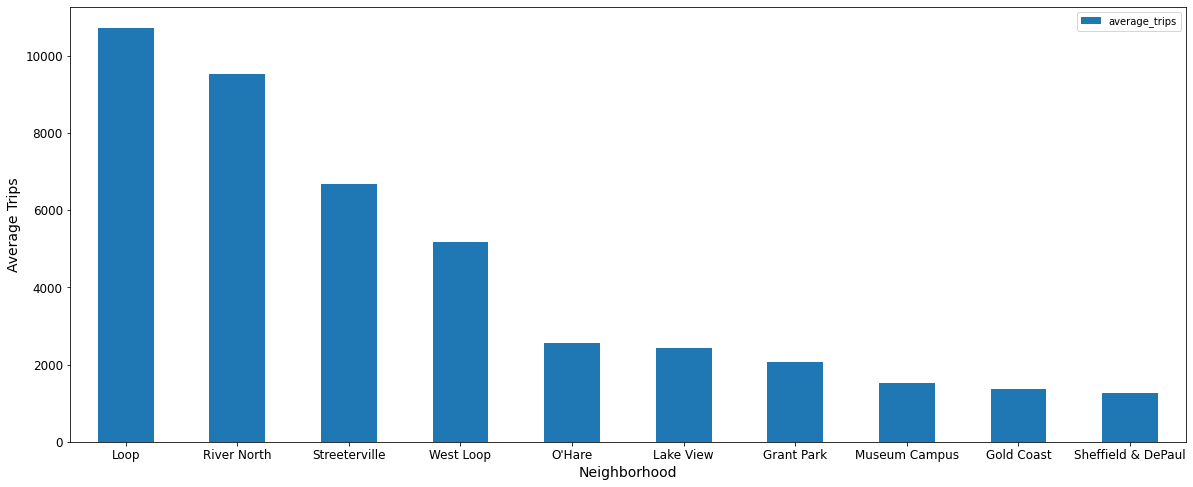

In [14]:
top_10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8))
# plots a bar chart with the neighborhoods on the x-axis and the average trips on the y-axis having a size of 20 by 8 inches
plt.xlabel('Neighborhood', fontsize=14) 
plt.ylabel('Average Trips', fontsize=14) 
plt.xticks(fontsize=12) # Increase font size of x tick labels
plt.yticks(fontsize=12) # Increase font size of y tick labels
plt.show()

- The most favored destinations, in descending order, are the Loop, River North, Streeterville, and West Loop neighborhoods.
- Sheffield & DePaul emerges as the least preferred destination among the listed neighborhoods.
- Notably, there exists a substantial contrast between the top four destinations and the remainder.
- For instance, the fourth most frequented destination, West Loop, records approximately twice the number of visits compared to O'Hare, which ranks as the fifth most popular destination.

<a id="4"></a> 
## Ranking Cab Companies by Number of Trips

- A horizontal bar chart based on the data from the "company_data" table can be created. Since there are 64 companies in total, 'plot.barh' will be utilized instead of 'plot.bar' to display the chart horizontally. 
- The range of values in the "trips_amount" column needs to be identified by obtaining a numerical summary of the column.

In [15]:
company_data['trips_amount'].describe() # description of average_trips column

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

- The minimum number of trips recorded in the "trips_amount" column is only 2 trips. To focus on companies with more significant numbers, a threshold of 500 trips will be set. 
- Thus, a subset from "company_data" table containing rows where the value in the "trips_amount" column is greater than or equal to 500 will be extracted by (using: company_data.query('trips_amount >= 500')). 
- Then, a horizontal bar chart will be created to visualize these values.

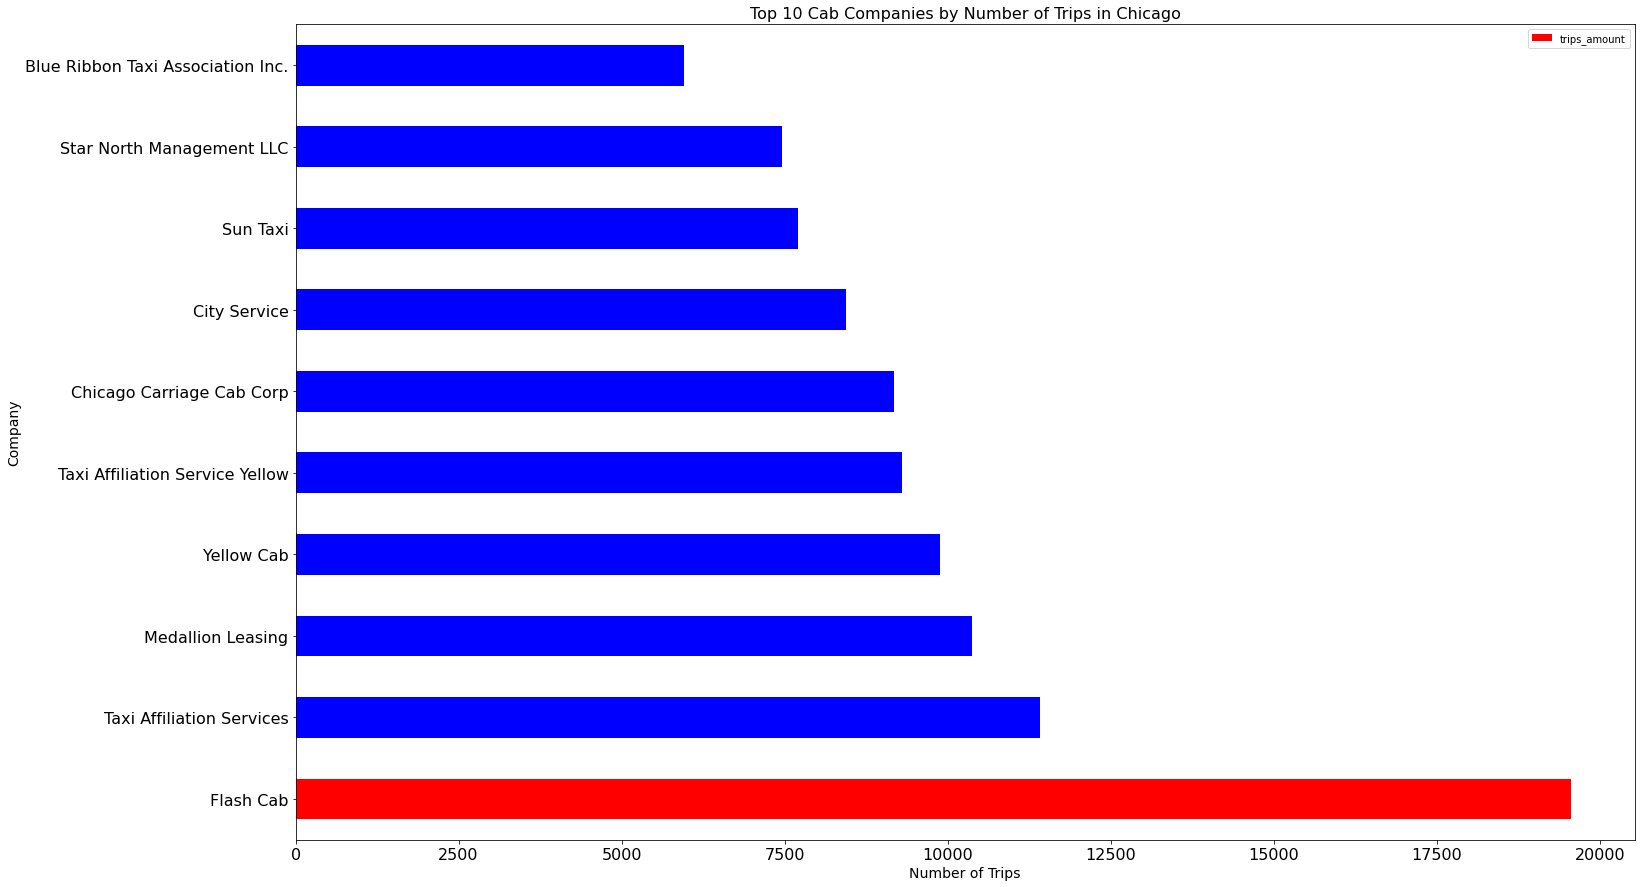

In [18]:
# Get only the top 10 cab companies
top_10_companies = company_data.nlargest(10, 'trips_amount')

# Assign unique colors, highlighting Flash Cab
colors = ['blue' if company != 'Flash Cab' else 'red' for company in top_10_companies['company_name']]

# Plot horizontal bar chart
top_10_companies.plot.barh(x='company_name', y='trips_amount', color=colors, rot=0, figsize=(24, 15))
plt.title('Top 10 Cab Companies by Number of Trips in Chicago', fontsize=16)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

- Flash Cab appears to dominate the market significantly, likely due to a larger fleet size. 
- Following closely is Taxi Affiliation Services. Upon applying the 500-trip threshold filter, our chart now includes only 26 companies. 
- This implies that 38 companies had fewer than 500 trips, indicating that a smaller number of companies hold the majority of the market share.

<a id="5"></a> 
# Stage 3: Hypothesis Testing

<a id="6"></a> 
## "Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [31]:
# Loading note from the remote Jupyter Hub Notebook
try:
    loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        loop_ohare = pd.read_csv("/User/deskstop/datasets/project_sql_result_07.csv")
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [32]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [33]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<AxesSubplot:>

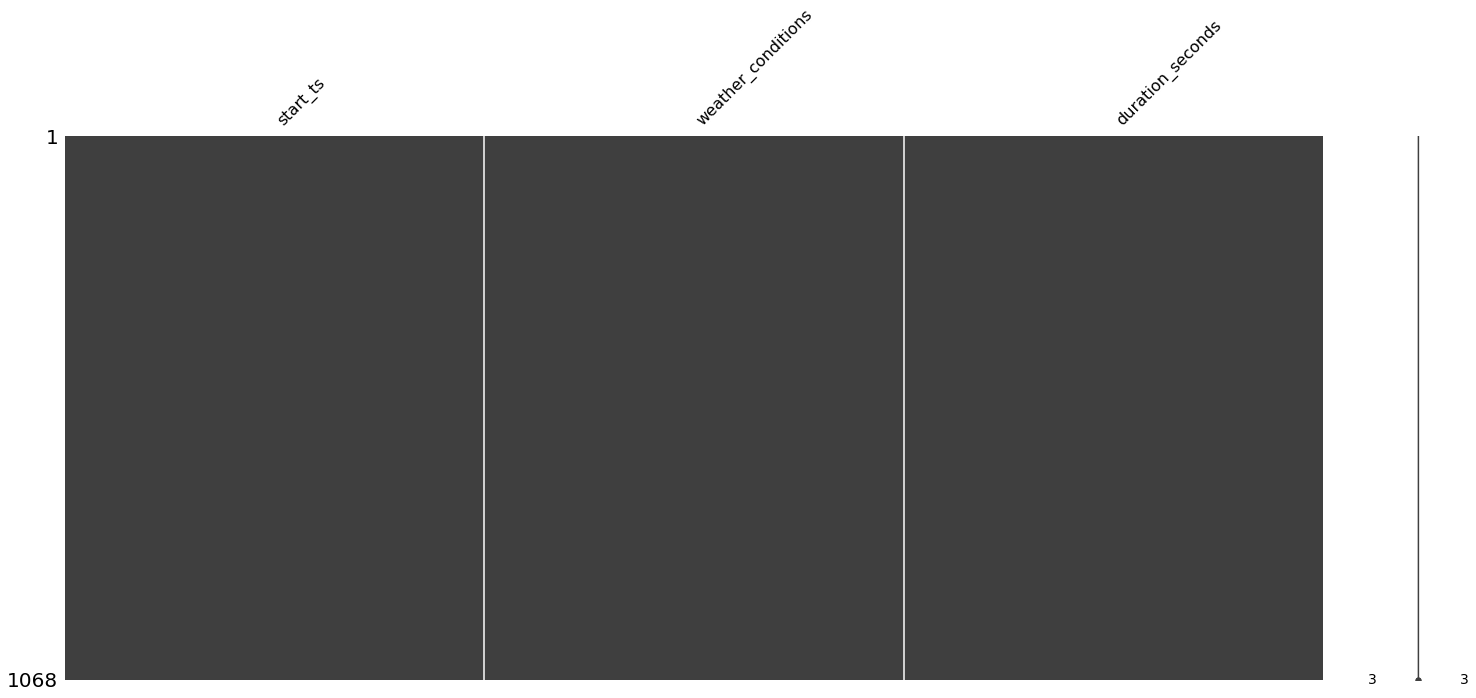

In [30]:
msno.matrix(loop_ohare) # check the missing values

In [34]:
loop_ohare['start_ts']=pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
# changes the format of the start_ts column to date-time following the existing format

loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


- Two slices needs to be created: one where the value of the weather_conditions column is "Good", and another where the value is "Bad"

In [35]:
good_weather = loop_ohare.query('weather_conditions == "Good"')
# creates slice from loop_ohare where the weather condition is "Good" 
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [36]:
bad_weather = loop_ohare.query('weather_conditions == "Bad"')
# creates slice from loop_ohare where the weather condition is "Bad" 
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


Testing Hypotheses:

- Null Hypothesis: 'The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays'. 
- Alternate Hypothesis: 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays'. 

- Before proceeding to hypothesis testing, it's essential to assess whether the variances can be deemed homogeneous.
- Levene's test will be tested by using the method st.levene() with the user_score columns from both slices as arguments. Additionally, set the parameter "center='mean'" to ensure consistency.
- The method returns a p-value, which we'll compare to a predefined threshold known as the statistical significance (often referred to as alpha).
- Alpha will be set to 5%. If the p-value exceeds alpha, the variances can be considered homogeneous. Conversely, if the p-value is lower than alpha, the variances cannot be considered homogeneous.

In [37]:
alpha = 0.05 
result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
# implements Levene's test on slice columns specifying that the variances were calculated from the mean

print('p-value:', result.pvalue)

if result.pvalue > alpha: # if the p-value is greater than alpha
    print('The variances are approximately the same') # The variances are approx. the same
    
else: # if the p-value is less than alpha
    print('The variances are too far apart to be considered homogeneous')
    # The variances can't be considered homogeneous

p-value: 0.3968505113995001
The variances are approximately the same


- Since the p-value exceeds alpha threshold, it can be concluded that the variances can be considered the same for hypothesis test.
- To conduct the hypothesis test, the st.ttest_ind() method will be utilized. This method evaluates the likelihood of the means of two statistical populations (represented by slice columns) being equal. Both slice columns will be used as arguments to the method, and set the parameter 'equal_var=True' based on Levene's test result, indicating homogeneous variances.
- The method returns a p-value, which will be compared to alpha threshold.
- If the p-value exceeds alpha, it suggests that the averages are likely to be the same, leading to a non-rejection of the null hypothesis.
- Conversely, if the p-value is lower than alpha, the null hypothesis can be rejected.

In [39]:
alpha = 0.05 
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)
#implements the t-test on slice columns specifying that variances are homogeneous

print('p-value:', result.pvalue) # prints the p-value

if result.pvalue > alpha: # if the p-value is greater than alpha
    print('The null hypothesis cannot be rejected')
    # the means are likely to be equal, so the null hypothesis cannot be rejected
    
else: # if the p-value is less than alpha
    print('The null hypothesis can be rejected')
    # the means are not likely to be equal, so the null hypothesis can be rejected

p-value: 6.517970327099473e-12
The null hypothesis can be rejected


- With a p-value lower than our alpha threshold, the null hypothesis can be rejected. 
- Thus, "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

<a id="7"></a> 
# Stage 4: General conclusion 

- A ranking of the top 10 neighborhoods was conducted and examined, with the Loop neighborhood securing the top position. - Sheffield & DePaul emerges as the least preferred destination among the listed neighborhoods.
- Upon ranking cab companies, it can be noted taht the overwhelming dominance of Flash Cab can be idientified in the market.
- Furthermore, we conducted a hypothesis test affirming that the average duration of rides from the Loop to O'Hare International Airport exhibits variation on rainy Saturdays.